In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import plotly.express as px
import cufflinks as cf

import plotly.tools 
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import chart_studio 
import chart_studio.plotly as py
import chart_studio.tools as tls

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
username = 'idaShobs'
api_key = '0CbL0aflTUW9j24yYVgP'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [3]:
# get_dataset_df(weekNumber, datasetFileName)
data_all_cats = utils.get_dataset_df(3, "all_categories")
data_cats_description = utils.get_dataset_df(3, "category_description")
data_countries_description = utils.get_dataset_df(3, "country_description")
data_updated_income = utils.get_dataset_df(3, "updated_income")
#data_all_cats
#data_cats_description
#data_countries_description
#data_updated_income

In [4]:
print(f"Sum of Null Values in each column \n{data_all_cats.isnull().sum()}")
print(f"Columns in data categories description \n{data_cats_description.columns}")
print(f"Columns in countries description \n {data_countries_description.columns}")
print(f"Columns in countries income description \n {data_updated_income.columns}")
print(f"Columns in main data frame \n {data_all_cats.columns}")



Sum of Null Values in each column 
Unnamed: 0                                     0
Unnamed: 0.1                                   0
Unnamed: 0.1.1                                 0
Unnamed: 0.1.1.1                               0
Classification                                 0
Year                                           0
Trade Flow Code                                0
Trade Flow                                     0
Reporter Code                                  0
Reporter                                       0
Reporter ISO                                   0
Partner Code                                   0
Partner                                        0
Partner ISO                                 5045
Commodity Code                                 0
Commodity                                      0
Qty Unit Code                                  0
Qty Unit                                       0
Qty                                        93850
Netweight (kg)                    

In [5]:
#Merge population column
data_all_cats['Population'] = 0.0
data_all_cats['Population'] = np.where((data_all_cats['Year'] <=2015), data_all_cats['Population in 2005 (in million)'], data_all_cats['Population'])
data_all_cats['Population'] = np.where((data_all_cats['Year'] >2015) & (data_all_cats['Year']<=2010), data_all_cats['Population in 2010 (in million)'], data_all_cats['Population'])
data_all_cats['Population'] = np.where((data_all_cats['Year'] >2010) & (data_all_cats['Year']<=2014), data_all_cats['Population in 2014 (in million)'], data_all_cats['Population'])
data_all_cats['Population'] = np.where((data_all_cats['Year'] >2014), data_all_cats['Population in 2018 (in million)'], data_all_cats['Population'])

In [6]:
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
data_all_cats = utils.merge_income_index_column(data_all_cats, years)



In [7]:
data_all_cats = data_all_cats.drop(columns = ['Classification', 'Partner Code', 'Reporter Code', 'Commodity Code', 'Category Code', 'Qty Unit Code', 'Trade Flow Code', 'Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Population in 2005 (in million)',
       'Population in 2010 (in million)', 'Population in 2014 (in million)',
       'Population in 2018 (in million)', 'ii2005', 'ii2006', 'ii2007',
       'ii2008', 'ii2009', 'ii2010', 'ii2011', 'ii2012', 'ii2013', 'ii2014',
       'ii2015', 'ii2016', 'ii2017', 'ii2018'])
print(f"Columns in main data frame after dropping unneeded columns \n {data_all_cats.columns}")

Columns in main data frame after dropping unneeded columns 
 Index(['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Partner',
       'Partner ISO', 'Commodity', 'Qty Unit', 'Qty', 'Netweight (kg)',
       'Trade Value (US$)', 'Category', 'Development Category',
       'Development Level', '% Malnutritioned Childern < 5 years old',
       'Total Imports in $', 'Income Index Rank', 'Population',
       'Income_Index'],
      dtype='object')


In [8]:
#Fill Null Values
data_all_cats['Partner ISO'].fillna(data_all_cats.Partner, inplace=True)
data_all_cats['Netweight (kg)'].fillna(0, inplace=True)
data_all_cats['Qty'].fillna(0, inplace=True)


In [9]:
#Remove Years before 2007
data_all_cats = data_all_cats[data_all_cats.Year > 2006]

In [10]:
#Transform columns to right format

data_all_cats['Trade Flow'] = data_all_cats['Trade Flow'].astype('category') 
data_all_cats['Year'] = pd.to_datetime(data_all_cats['Year'], format='%Y')
#df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
#data_all_cats['Reporter'] = data_all_cats['Reporter'].astype('category') 
data_all_cats['Reporter ISO'] = data_all_cats['Reporter ISO'].astype('category') 
data_all_cats['Commodity'] = data_all_cats['Commodity'].astype('category') 
data_all_cats['Partner ISO'] = data_all_cats['Partner ISO'].astype('category') 
data_all_cats['Partner'] = data_all_cats['Partner'].astype('category') 
data_all_cats['Category'] = data_all_cats['Category'].astype('category') 
data_all_cats['Development Category'] = data_all_cats['Development Category'].astype('category') 
print(f"Data types of columns after transforming to right data type \n {data_all_cats.dtypes}")



Data types of columns after transforming to right data type 
 Year                                       datetime64[ns]
Trade Flow                                       category
Reporter                                           object
Reporter ISO                                     category
Partner                                          category
Partner ISO                                      category
Commodity                                        category
Qty Unit                                           object
Qty                                               float64
Netweight (kg)                                    float64
Trade Value (US$)                                   int64
Category                                         category
Development Category                             category
Development Level                                  object
% Malnutritioned Childern < 5 years old           float64
Total Imports in $                                float64
Income Ind

In [11]:
data = data_all_cats.copy()
print(f"There are {data['Trade Flow'].nunique()} different trade flows: {data['Trade Flow'].unique()} \n")
print(f"The records are from {data[['Year']].nunique()} different years: {data['Year'].unique()} \n")
print(f"There are totally {len(data['Reporter'].unique())} reporters: {data['Reporter'].unique()} \n")
print(f"There are totally {len(data['Partner'].unique())} partners\n")
print(f"There are totally {len(data['Category'].unique())} kinds of food categories")

There are 3 different trade flows: ['Import', 'Export', 'Re-Import']
Categories (3, object): ['Import', 'Export', 'Re-Import'] 

The records are from Year    13
dtype: int64 different years: ['2007-01-01T00:00:00.000000000' '2008-01-01T00:00:00.000000000'
 '2009-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2011-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2013-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000'] 

There are totally 15 reporters: ['Germany' 'China, Hong Kong SAR' 'Japan' 'Rep. of Korea' 'USA' 'Brazil'
 'China' 'Mexico' 'Thailand' 'Turkey' 'Egypt' 'India' 'Nigeria' 'Pakistan'
 'Viet Nam'] 

There are totally 247 partners

There are totally 5 kinds of food categories


# Tasks 
* Analyze trade value (import&export, categories) by development index, by population
* Find correlation between trade value sum of exports&import and development index
* Find correlation betweent the growth of trade value and the growth of population

In [12]:
#get percentage of import to total import
data_Frame = (data.groupby(['Year', 'Reporter']).agg({'Trade Value (US$)':"sum"}))
Reporter = data_Frame.groupby(['Reporter']).agg({'Trade Value (US$)':"sum"})
data_Frame = data_Frame.div(Reporter, level='Reporter') * 100
data_Frame = data_Frame.rename(columns={'Trade Value (US$)': 'Import_growth'})

#get percentage of import to total import
data_Frame2 = (data.groupby(['Year', 'Reporter']).agg({'Population':"sum"}))
Reporter = data_Frame2.groupby(['Reporter']).agg({'Population':"sum"})
data_Frame2 = data_Frame2.div(Reporter, level='Reporter') * 100
data_Frame2 = data_Frame2.rename(columns={'Population': 'Population_growth'})

data_Frame = pd.concat([data_Frame,data_Frame2], axis=1, join='inner')
#other needed data
df_agg2 = (data.groupby(['Year', 'Reporter']).agg({'Trade Value (US$)':"sum", 'Population': "last", '% Malnutritioned Childern < 5 years old':"last", 'Total Imports in $':'last', 'Income_Index' : 'last', 'Development Category' : 'last','Reporter ISO' :'last'}))
df_agg2 = df_agg2.rename(columns={'Trade Value (US$)': 'Trade_value'})
data_Frame = pd.concat([data_Frame,df_agg2], axis=1, join='inner').reset_index()
data_Frame['pct_change_income']= data_Frame.groupby(['Reporter'])['Income_Index'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100
data_Frame['pct_change_import']= data_Frame.groupby(['Reporter'])['Trade_value'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100
style = dict(size=10, color='gray')
#Test that its accurate
cat_1 = data_Frame[data_Frame['Development Category']==1]['Reporter'].unique().tolist()
cat_2 = data_Frame[data_Frame['Development Category']==2]['Reporter'].unique().tolist()
cat_3 = data_Frame[data_Frame['Development Category']==3]['Reporter'].unique().tolist()
data_Frame.sort_values(by=['Year', 'Reporter', 'Development Category'], inplace=True)

In [13]:
data_select = data_Frame[['Population_growth', 'Import_growth', 'pct_change_import', 'pct_change_income']]
data_select.corr()

,Population_growth,Import_growth,pct_change_import,pct_change_income
Population_growth,1.000000,0.577280,-0.085378,-0.023026
Import_growth,0.577280,1.000000,0.423970,0.103581
pct_change_import,-0.085378,0.423970,1.000000,0.213960
pct_change_income,-0.023026,0.103581,0.213960,1.000000


In [14]:
sns.set_theme()

In [24]:
fig = px.histogram(data_Frame, x='Population', y='Trade_value', color='Reporter', marginal="rug", color_discrete_sequence=px.colors.qualitative.G10, hover_data=['Reporter', 'Year', 'Import_growth', 'Development Category' ], title="Overview of Sum of Trade Value vs Population")
fig.show()
py.plot(fig, filename = f'Trade_vs_Pop', auto_open=False)


'https://plotly.com/~idaShobs/30/'

* 'https://plotly.com/~idaShobs/30/'


In [15]:
def show_per_cat(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        data_Frame2 = df_agg[df_agg['Reporter'].isin(values)]
        fig=px.bar(data_Frame2, x='Year',y='Trade_value', color="Reporter", barmode="group", text='Trade_value',  title=f"Annual Import Trade Value ({key} Income Index Countries) " ) 
        
        
        fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
        fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        fig.show()
        py.plot(fig, filename = f'Annual_Trade_Value_{key}', auto_open=False)

show_per_cat(data_Frame.copy())


# Link for embedding
* https://plotly.com/~idaShobs/1/
* https://plotly.com/~idaShobs/2/
* https://plotly.com/~idaShobs/3/

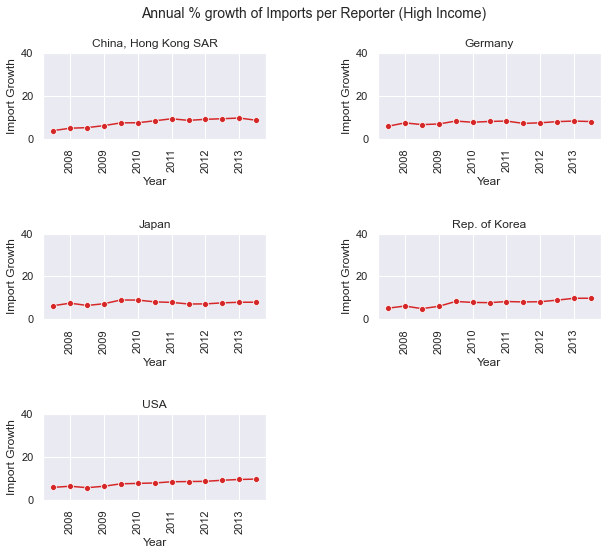

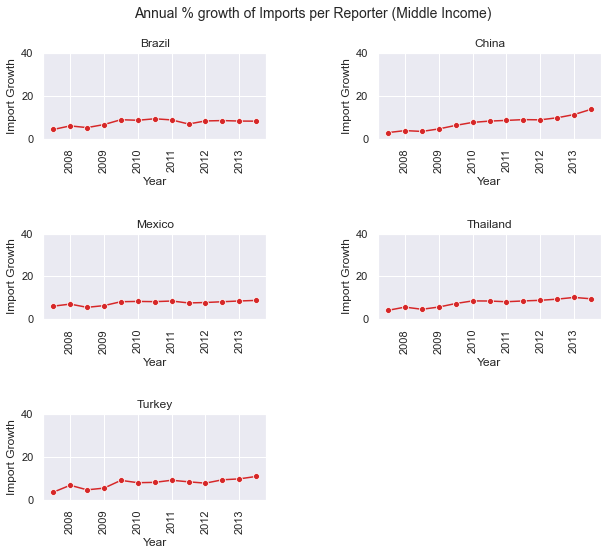

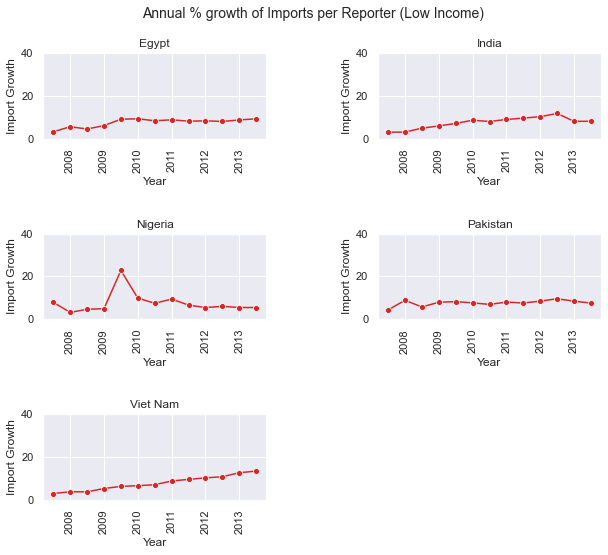

In [16]:
#Trade value of each reporter by import

def show_plot(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        count = 0
        fig = plt.figure(figsize=(10,8))
        spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
        fig.tight_layout();
        fig.subplots_adjust(hspace=1.1, wspace=0.5, top=0.9);

        for a in range(3):
            for b in range(2):
                if count != len(values):
                    cat = values[count]
                    dt = df_agg[df_agg['Reporter'] ==cat]
                    x = dt["Year"]
                    y = dt['Import_growth']
                    ax = fig.add_subplot(spec2[a,b]);
                    ax = sns.lineplot(ax=ax, x=x, y=y, data=dt, color='tab:red', marker='o');
                    ax.tick_params(axis='y')
                    ax.set_xticklabels(pd.DatetimeIndex(df_agg['Year'].unique()).year);
                    ax.set(ylim=(0.0, 40.0))
                    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
                    plt.xticks(rotation=90);
                    #ax.text(x='2008', y='', s='Recession', **style)
                    ax.set_xlabel('Year');
                    ax.set_ylabel(f'Import Growth');
                    ax.set_title(cat);
                    count = count +1
        fig.suptitle(f"Annual % growth of Imports per Reporter ({key} Income)", fontsize=14);
        plt.show();

show_plot(data_Frame.copy())


        


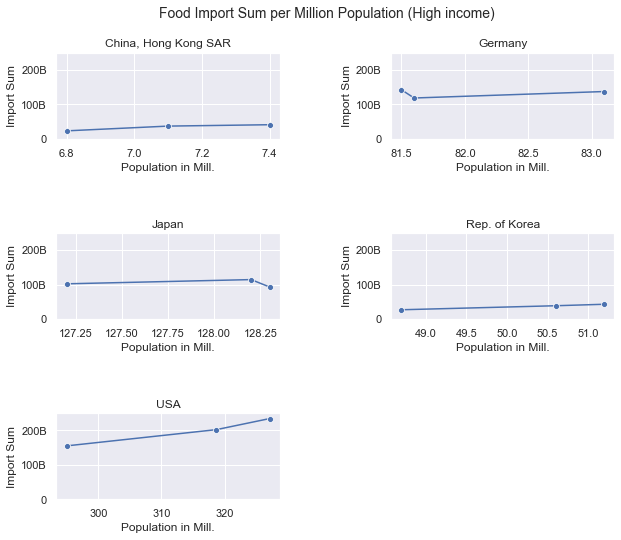

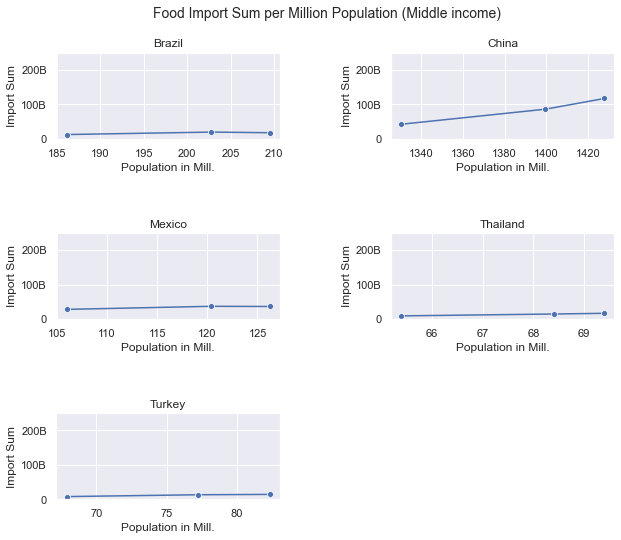

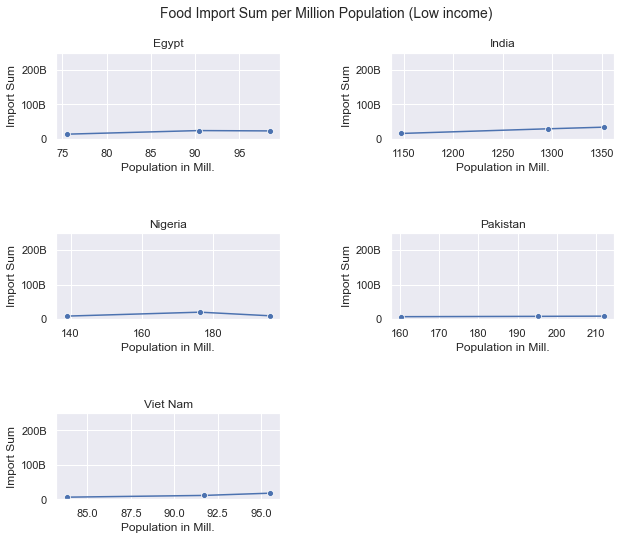

In [17]:
#Ratio of trade value sum to population
max_x = data_Frame['Trade_value'].max()
def show_plot(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        count = 0
        fig = plt.figure(figsize=(10,8))
        spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
        fig.tight_layout();
        fig.subplots_adjust(hspace=1.1, wspace=0.5, top=0.9);
        for a in range(3):
            for b in range(2):
                if count != len(values):
                    cat = values[count]
                    dt = df_agg[df_agg['Reporter'] ==cat]
                    y = dt["Trade_value"]
                    x = dt["Population"]
                    ax = fig.add_subplot(spec2[a,b]);
                    sns.lineplot(ax=ax, x=x, y=y, data=dt, marker='o', ci = None);
                    ax.set(ylim=(0, max_x))
                    ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
                    ax.set_ylabel('Import Sum');
                    ax.set_xlabel('Population in Mill.');
                    ax.set_title(cat);
                    count = count +1
        
        fig.suptitle(f"Food Import Sum per Million Population ({key} income)", fontsize=14);

show_plot(data_Frame.copy())

* Amongst the developed countries, USA spends the most on food as their population grows. HongKong and Korea spend the least, due to low population. But generally, trade value sum is directly proportional to population amongst developed countries
* Low developed countries spend the least on imports but their population are amongst the highest. The proportion of Import Sum to population increase is almost constant.
* Same as Low income countries, applies to Middle Income countries, China is an outlier in Middle Income countries. Their import sum grew over the years as the population grew.
* One can observe that there is a positive correlation between development index and Import Sum

Text(0.5, 0.98, 'Correlation between Import Growth and Population Growth')

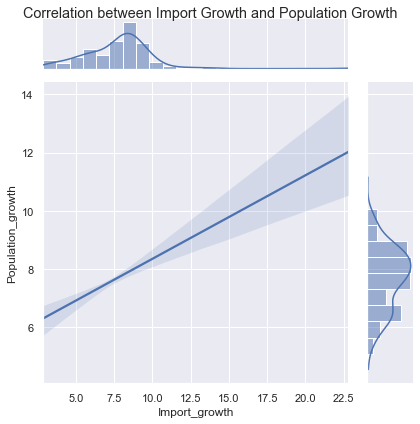

In [18]:
g = sns.jointplot(x=data_Frame['Import_growth'], y=data_Frame['Population_growth'], data=data_Frame, kind='reg');
g.fig.suptitle('Correlation between Import Growth and Population Growth');
g.ax_joint.collections[0].set_alpha(0)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

* One can clearly see here that Population Growth and Import Growth are positively linearly correlated.  
* If Population growth is high, Import Growth would be high too

In [27]:

data2=go.Scatter(x=data_Frame['Reporter'],y=data_Frame['Population_growth'], name="Population Growth in %", mode="lines + markers") 
data1=go.Scatter(x=data_Frame['Reporter'],y=data_Frame['Import_growth'],name="Import Growth In %",mode="lines + markers")
mydata = [data1, data2]
mylayout = go.Layout( title="Population Growth vs. Import Growth")
fig = go.Figure(data=mydata, layout=mylayout)

fig.show()
py.plot(fig, filename = f'Population_vs_Import_Growth', auto_open=True)
#chart_studio.plotly.iplot(fig)

'https://plotly.com/~idaShobs/10/'

## Link for Embedding
* https://plotly.com/~idaShobs/10/

In [29]:

def show_per_cat(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        data_Frame2 = df_agg[df_agg['Reporter'].isin(values)]
        data2=go.Scatter(x=data_Frame2['Reporter'],y=data_Frame2['Population_growth'], name="Population Growth in %", mode="lines + markers") 
        data1=go.Scatter(x=data_Frame2['Reporter'],y=data_Frame2['Import_growth'],name="Import Growth In %",mode="lines + markers")
        mydata = [data1, data2]
        mylayout = go.Layout( title=f"Population Growth vs. Import Growth ({key} Income Index)")
        fig = go.Figure(data=mydata, layout=mylayout)
        fig.show()
        py.plot(fig, filename = f'Pop_vs_Imp_growth_{key}', auto_open=False)

show_per_cat(data_Frame.copy())


* https://chart-studio.plotly.com/~idaShobs/16/#/
* https://chart-studio.plotly.com/~idaShobs/12/#/
* https://chart-studio.plotly.com/~idaShobs/14

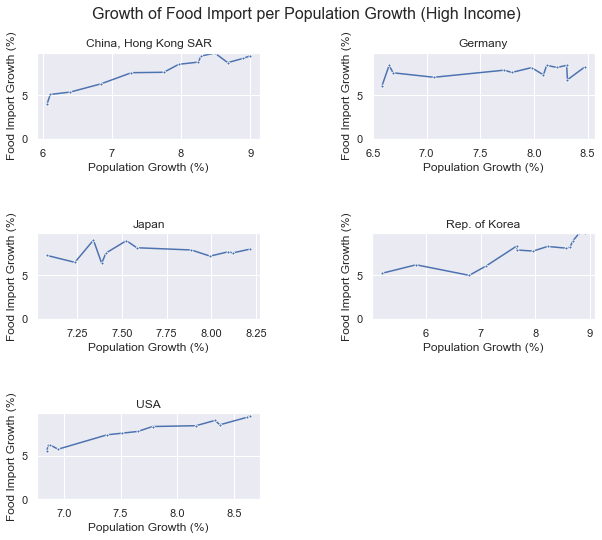

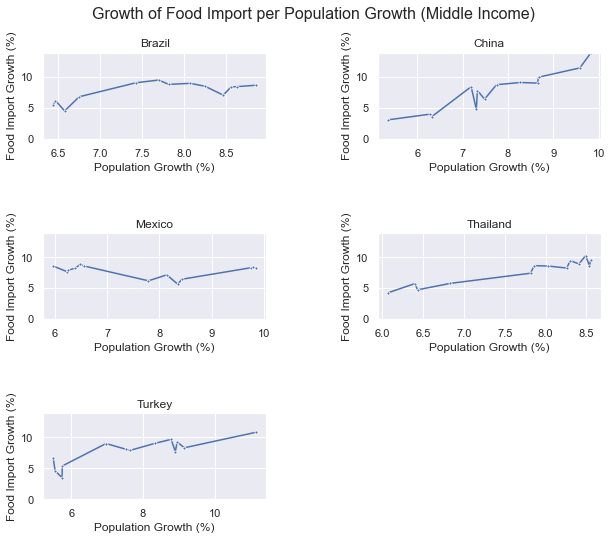

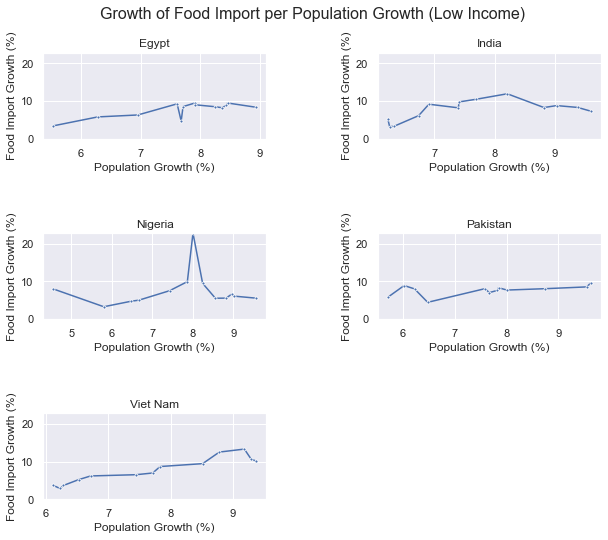

In [19]:
#Ratio of trade value growth to population

def show_plot(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        count = 0
        fig = plt.figure(figsize=(10,8))
        spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
        fig.tight_layout();
        fig.subplots_adjust(hspace=1.1, wspace=0.5, top=0.9);
        max_y = df_agg[df_agg['Reporter'].isin(values)]['Import_growth'].max()
        for a in range(3):
            for b in range(2):
                if count != len(values):
                    cat = values[count]
                    dt = df_agg[df_agg['Reporter'] ==cat]
                    y = dt["Import_growth"]
                    x = dt["Population_growth"]
                    ax = fig.add_subplot(spec2[a,b]);
                    sns.lineplot(ax=ax, x=x, y=y, data=dt, marker='.', ci = None);
                    ax.set(ylim=(0, max_y))
                    ax.set_ylabel('Food Import Growth (%)');
                    ax.set_xlabel('Population Growth (%)');
                    ax.set_title(cat);
                    count = count +1
        
        fig.suptitle(f"Growth of Food Import per Population Growth ({key} Income)", fontsize=16);
show_plot(data_Frame.copy())

* The food import of china, Pakistan, Republic of Korea, Viet Nam is directly proportional to their population growth
* Generally, There is a direct correlation of population growth to Food Import Growth, Countries like Nigeria are outliers because of the sudden spike and decline from 2011


Text(0.5, 0.98, 'Correlation between Import Growth and Income Index')

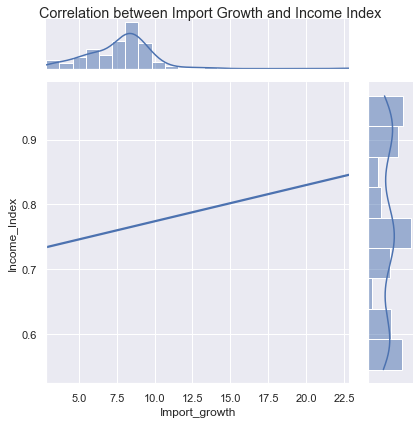

In [20]:
g = sns.jointplot(x=data_Frame['Import_growth'], y=data_Frame['Income_Index'], data=data_Frame, kind='reg', ci=None);
g.fig.suptitle('Correlation between Import Growth and Income Index');
g.ax_joint.collections[0].set_alpha(0)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

Text(0.5, 0.98, 'Correlation between percentage change of Trade Value and Income Index')

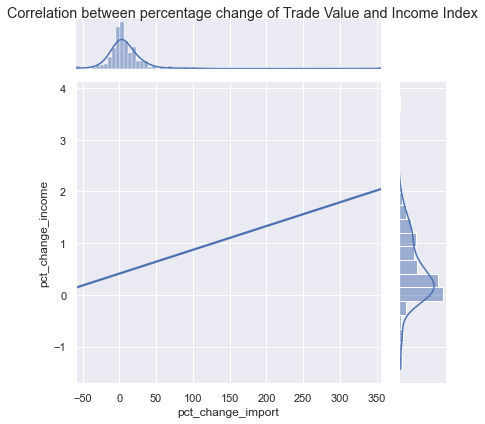

In [21]:
g = sns.jointplot(x=data_Frame['pct_change_import'], y=data_Frame['pct_change_income'], data=data_Frame, kind='reg', ci=None);
g.fig.suptitle('Correlation between percentage change of Trade Value and Income Index');
g.ax_joint.collections[0].set_alpha(0)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

* One can observe a positive albeit weak correlation between Income Index and Import Trade Value 

In [30]:

def show_per_cat(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        data_Frame2 = df_agg[df_agg['Reporter'].isin(values)]
        data2=go.Scatter(x=data_Frame2['Reporter'],y=data_Frame2['pct_change_income'], name="Income Index", mode="lines + markers") 
        data1=go.Scatter(x=data_Frame2['Reporter'],y=data_Frame2['pct_change_import'],name="Import Trade Value",mode="lines + markers")
        mydata = [data1, data2]
        mylayout = go.Layout( title=f"Percentage Change in Income Index vs. Trade Value ({key} Income Index)")
        fig = go.Figure(data=mydata, layout=mylayout)
        fig.show()
        py.plot(fig, filename = f'Index_vs_Imp_growth_{key}', auto_open=False)

show_per_cat(data_Frame.copy())

* https://plotly.com/~idaShobs/25/
* https://plotly.com/~idaShobs/23/
* https://plotly.com/~idaShobs/21/

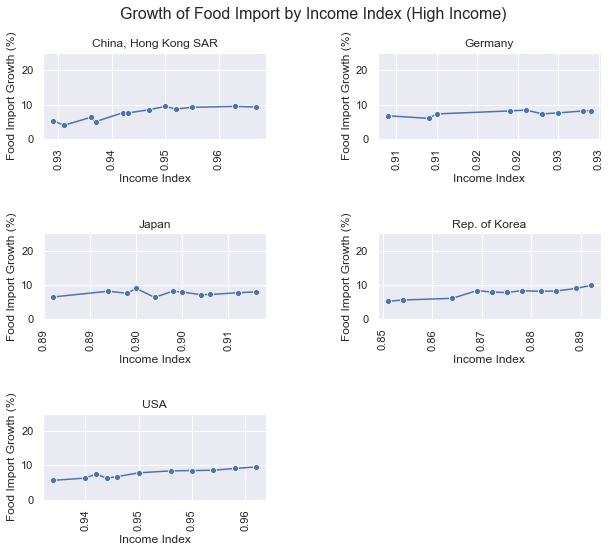

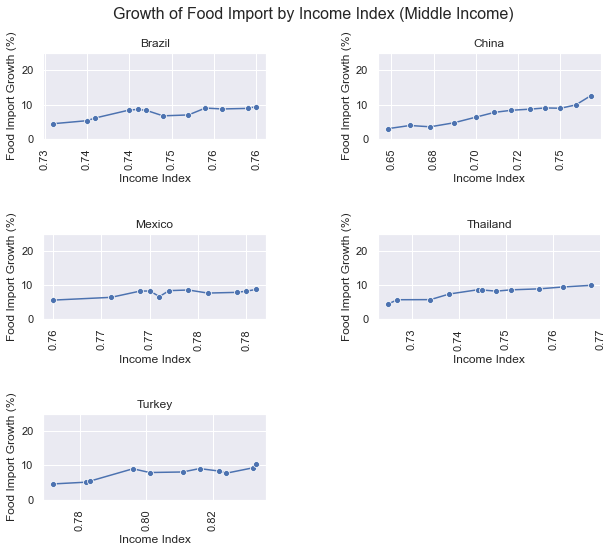

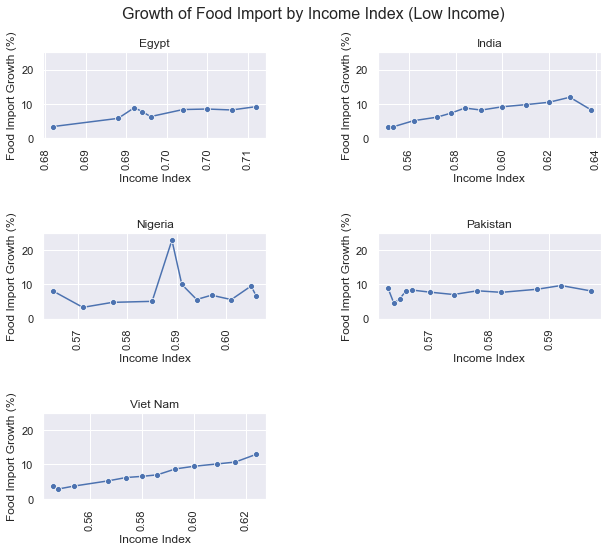

In [23]:
#Ratio of trade value sum to income index
from matplotlib.ticker import StrMethodFormatter
#data_Frame['pct_change']= data_Frame.groupby(['Reporter'])['Income_Index'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100
def show_plot(df_agg):
    cat_dict = {'High':cat_1, 'Middle':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        count = 0
        fig = plt.figure(figsize=(10,8))
        spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
        fig.tight_layout();
        fig.subplots_adjust(hspace=1.1, wspace=0.5, top=0.9);
        for a in range(3):
            for b in range(2):
                if count != len(values):
                    cat = values[count]
                    dt = df_agg[df_agg['Reporter'] ==cat]
                    y = dt["Import_growth"]
                    x = dt["Income_Index"]
                    ax = fig.add_subplot(spec2[a,b]);
                    plt.xticks(rotation=90);
                    ax.set(ylim=(0, 25.0))
                    sns.lineplot(ax=ax, x=x, y=y, data=dt, marker='o', ci = None);
                    ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
                    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'));
                    ax.set_ylabel('Food Import Growth (%)');
                    ax.set_xlabel(f'Income Index');
                    ax.set_title(cat);
                    count = count +1
        
        fig.suptitle(f"Growth of Food Import by Income Index ({key} Income)", fontsize=16);
show_plot(data_Frame.copy())

* The Food Import Growth For Vietnam and China is directly proportional to their income index. Even though Vietnam imports food the least
* One can deduct that there is a positive correlation between development index and Import Sum. However, the correlation is weak. This can be due to the fact that food trade is just a tiny fragment of what factors in to a countries development 
* Nigeria is strong outlier to this observation